<a href="https://colab.research.google.com/github/Shanthireddyy/Twitter-Sentiment-Analysiss/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
a=np.random.randint(10,size=(3,3))
print(a)

a[:,:1]

[[4 6 4]
 [8 6 6]
 [4 4 5]]


array([[4],
       [8],
       [4]])

In [ ]:
df = pd.read_csv('Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
df.shape

(20000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(['post_id','post_created','followers','friends','favourites','statuses','retweets'],axis = 1)
df.head()

,post_text,user_id,label
0,It's just over 2 years since I was diagnosed w...,1013187241,1
1,"It's Sunday, I need a break, so I'm planning t...",1013187241,1
2,Awake but tired. I need to sleep but my brain ...,1013187241,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,1
4,It’s hard to say whether packing lists are mak...,1013187241,1


In [ ]:
des = pd.DataFrame(df['post_text'].describe())
des

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [ ]:
df['post_text'] = df['post_text'].str.lower()
df['post_text'] = df['post_text'].str.replace("\d","")
df['post_text'] = df['post_text'].str.replace("[^\w\s]","")
df.head()

<ipython-input-10-bceef8c0247b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['post_text'] = df['post_text'].str.replace("\d","")
<ipython-input-10-bceef8c0247b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['post_text'] = df['post_text'].str.replace("[^\w\s]","")


,post_text,user_id,label
0,its just over years since i was diagnosed wit...,1013187241,1
1,its sunday i need a break so im planning to sp...,1013187241,1
2,awake but tired i need to sleep but my brain h...,1013187241,1
3,rt sewhq retro bears make perfect gifts and ar...,1013187241,1
4,its hard to say whether packing lists are maki...,1013187241,1


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
df.head()

,post_text,user_id,label
0,years since diagnosed anxiety depression today...,1013187241,1
1,sunday need break im planning spend little tim...,1013187241,1
2,awake tired need sleep brain ideas,1013187241,1
3,rt sewhq retro bears make perfect gifts great ...,1013187241,1
4,hard say whether packing lists making life eas...,1013187241,1


In [ ]:
from textblob import Word
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

df["post_text"] = df["post_text"].apply(lemmatize_text)
df.head()

,post_text,user_id,label
0,year since diagnosed anxiety depression today ...,1013187241,1
1,sunday need break im planning spend little tim...,1013187241,1
2,awake tired need sleep brain idea,1013187241,1
3,rt sewhq retro bear make perfect gift great be...,1013187241,1
4,hard say whether packing list making life easi...,1013187241,1


In [ ]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: word_tokenize(x))
df.head()

,post_text,user_id,label,tokens
0,year since diagnosed anxiety depression today ...,1013187241,1,"[year, since, diagnosed, anxiety, depression, ..."
1,sunday need break im planning spend little tim...,1013187241,1,"[sunday, need, break, im, planning, spend, lit..."
2,awake tired need sleep brain idea,1013187241,1,"[awake, tired, need, sleep, brain, idea]"
3,rt sewhq retro bear make perfect gift great be...,1013187241,1,"[rt, sewhq, retro, bear, make, perfect, gift, ..."
4,hard say whether packing list making life easi...,1013187241,1,"[hard, say, whether, packing, list, making, li..."


In [ ]:
from textblob import TextBlob
L = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    L.append(blob)

df2 = pd.DataFrame(L)
print(len(L))
df2.head()


20000


,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,0.900000,0.875000
4,-0.045833,0.370833


In [ ]:

dff = pd.concat([df, df2], axis=1)
dff.head()

,post_text,user_id,label,tokens,polarity,subjectivity
0,year since diagnosed anxiety depression today ...,1013187241,1,"[year, since, diagnosed, anxiety, depression, ...",0.100000,1.000000
1,sunday need break im planning spend little tim...,1013187241,1,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000
2,awake tired need sleep brain idea,1013187241,1,"[awake, tired, need, sleep, brain, idea]",-0.400000,0.700000
3,rt sewhq retro bear make perfect gift great be...,1013187241,1,"[rt, sewhq, retro, bear, make, perfect, gift, ...",0.900000,0.875000
4,hard say whether packing list making life easi...,1013187241,1,"[hard, say, whether, packing, list, making, li...",-0.045833,0.370833


In [ ]:
def get_sentiment(pol):
    if pol < 0:
        sentiment = 'Negative'
    elif pol > 0:
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'

    return sentiment

dff["Unigram_Sentiment"] = dff["polarity"].apply(get_sentiment)
dff = dff.drop(['polarity','subjectivity'], axis = 1)
dff.head()

,post_text,user_id,label,tokens,Unigram_Sentiment
0,year since diagnosed anxiety depression today ...,1013187241,1,"[year, since, diagnosed, anxiety, depression, ...",Positive
1,sunday need break im planning spend little tim...,1013187241,1,"[sunday, need, break, im, planning, spend, lit...",Negative
2,awake tired need sleep brain idea,1013187241,1,"[awake, tired, need, sleep, brain, idea]",Negative
3,rt sewhq retro bear make perfect gift great be...,1013187241,1,"[rt, sewhq, retro, bear, make, perfect, gift, ...",Positive
4,hard say whether packing list making life easi...,1013187241,1,"[hard, say, whether, packing, list, making, li...",Negative


In [ ]:
from nltk.util import bigrams

def create_bigrams(text):
    tokens = word_tokenize(text)
    bi_grams = list(bigrams(tokens))
    return bi_grams

dff["bigrams"] = dff["post_text"].apply(create_bigrams)
dff.head()

,post_text,user_id,label,tokens,Unigram_Sentiment,bigrams
0,year since diagnosed anxiety depression today ...,1013187241,1,"[year, since, diagnosed, anxiety, depression, ...",Positive,"[(year, since), (since, diagnosed), (diagnosed..."
1,sunday need break im planning spend little tim...,1013187241,1,"[sunday, need, break, im, planning, spend, lit...",Negative,"[(sunday, need), (need, break), (break, im), (..."
2,awake tired need sleep brain idea,1013187241,1,"[awake, tired, need, sleep, brain, idea]",Negative,"[(awake, tired), (tired, need), (need, sleep),..."
3,rt sewhq retro bear make perfect gift great be...,1013187241,1,"[rt, sewhq, retro, bear, make, perfect, gift, ...",Positive,"[(rt, sewhq), (sewhq, retro), (retro, bear), (..."
4,hard say whether packing list making life easi...,1013187241,1,"[hard, say, whether, packing, list, making, li...",Negative,"[(hard, say), (say, whether), (whether, packin..."


In [ ]:

def analyze_bigram_sentiment(text):
    blob = TextBlob(text)
    words = blob.words

    bigrams = [f"{words[i]} {words[i+1]}" for i in range(len(words) - 1)]
    bigram_sentiment = 0.0

    for bigram in bigrams:
        bigram_blob = TextBlob(bigram)
        bigram_sentiment += bigram_blob.sentiment.polarity

    return bigram_sentiment

dff['Sentiment_Score'] = dff['post_text'].apply(analyze_bigram_sentiment)

In [ ]:
dff['Bigram_Sentiment'] = dff['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
dff = dff.drop(['Sentiment_Score'], axis = 1)
dff.head()

,post_text,user_id,label,tokens,Unigram_Sentiment,bigrams,Bigram_Sentiment
0,year since diagnosed anxiety depression today ...,1013187241,1,"[year, since, diagnosed, anxiety, depression, ...",Positive,"[(year, since), (since, diagnosed), (diagnosed...",Positive
1,sunday need break im planning spend little tim...,1013187241,1,"[sunday, need, break, im, planning, spend, lit...",Negative,"[(sunday, need), (need, break), (break, im), (...",Negative
2,awake tired need sleep brain idea,1013187241,1,"[awake, tired, need, sleep, brain, idea]",Negative,"[(awake, tired), (tired, need), (need, sleep),...",Negative
3,rt sewhq retro bear make perfect gift great be...,1013187241,1,"[rt, sewhq, retro, bear, make, perfect, gift, ...",Positive,"[(rt, sewhq), (sewhq, retro), (retro, bear), (...",Positive
4,hard say whether packing list making life easi...,1013187241,1,"[hard, say, whether, packing, list, making, li...",Negative,"[(hard, say), (say, whether), (whether, packin...",Positive


In [ ]:
from nltk.util import trigrams

def create_trigrams(text):
    tokens = word_tokenize(text)
    tri_grams = list(trigrams(tokens))
    return tri_grams

dff["trigrams"] = dff["post_text"].apply(create_trigrams)
dff.head()

,post_text,user_id,label,tokens,Unigram_Sentiment,bigrams,Bigram_Sentiment,trigrams
0,year since diagnosed anxiety depression today ...,1013187241,1,"[year, since, diagnosed, anxiety, depression, ...",Positive,"[(year, since), (since, diagnosed), (diagnosed...",Positive,"[(year, since, diagnosed), (since, diagnosed, ..."
1,sunday need break im planning spend little tim...,1013187241,1,"[sunday, need, break, im, planning, spend, lit...",Negative,"[(sunday, need), (need, break), (break, im), (...",Negative,"[(sunday, need, break), (need, break, im), (br..."
2,awake tired need sleep brain idea,1013187241,1,"[awake, tired, need, sleep, brain, idea]",Negative,"[(awake, tired), (tired, need), (need, sleep),...",Negative,"[(awake, tired, need), (tired, need, sleep), (..."
3,rt sewhq retro bear make perfect gift great be...,1013187241,1,"[rt, sewhq, retro, bear, make, perfect, gift, ...",Positive,"[(rt, sewhq), (sewhq, retro), (retro, bear), (...",Positive,"[(rt, sewhq, retro), (sewhq, retro, bear), (re..."
4,hard say whether packing list making life easi...,1013187241,1,"[hard, say, whether, packing, list, making, li...",Negative,"[(hard, say), (say, whether), (whether, packin...",Positive,"[(hard, say, whether), (say, whether, packing)..."


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('post_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Unigram_Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Bigram_Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('post_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='post_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Unigram_Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Unigram_Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Bigram_Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Bigram_Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['user_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'user_id'}, axis=1)
              .sort_values('user_id', ascending=True))
  xs = counted['user_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('user_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('post_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='post_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Unigram_Sentiment'].value_counts()
    for x_label, grp in _df_9.groupby('post_text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('post_text')
_ = plt.ylabel('Unigram_Sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Bigram_Sentiment'].value_counts()
    for x_label, grp in _df_10.groupby('Unigram_Sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Unigram_Sentiment')
_ = plt.ylabel('Bigram_Sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['post_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='index', y='post_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Unigram_Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Unigram_Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Bigram_Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Bigram_Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
def analyze_trigram_sentiment(text):
    blob = TextBlob(text)
    words = blob.words

    trigrams = [f"{words[i]} {words[i+1]}" for i in range(len(words) - 1)]
    trigram_sentiment = 0.0

    for trigram in trigrams:
        trigram_blob = TextBlob(trigram)
        trigram_sentiment += trigram_blob.sentiment.polarity

    return trigram_sentiment

dff['Sentiment_Score'] = dff['post_text'].apply(analyze_trigram_sentiment)

In [ ]:
dff['Trigram_Sentiment'] = dff['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
dff = dff.drop(['Sentiment_Score'], axis = 1)
dff.head()

,post_text,user_id,label,tokens,Unigram_Sentiment,bigrams,Bigram_Sentiment,trigrams,Trigram_Sentiment
0,year since diagnosed anxiety depression today ...,1013187241,1,"[year, since, diagnosed, anxiety, depression, ...",Positive,"[(year, since), (since, diagnosed), (diagnosed...",Positive,"[(year, since, diagnosed), (since, diagnosed, ...",Positive
1,sunday need break im planning spend little tim...,1013187241,1,"[sunday, need, break, im, planning, spend, lit...",Negative,"[(sunday, need), (need, break), (break, im), (...",Negative,"[(sunday, need, break), (need, break, im), (br...",Negative
2,awake tired need sleep brain idea,1013187241,1,"[awake, tired, need, sleep, brain, idea]",Negative,"[(awake, tired), (tired, need), (need, sleep),...",Negative,"[(awake, tired, need), (tired, need, sleep), (...",Negative
3,rt sewhq retro bear make perfect gift great be...,1013187241,1,"[rt, sewhq, retro, bear, make, perfect, gift, ...",Positive,"[(rt, sewhq), (sewhq, retro), (retro, bear), (...",Positive,"[(rt, sewhq, retro), (sewhq, retro, bear), (re...",Positive
4,hard say whether packing list making life easi...,1013187241,1,"[hard, say, whether, packing, list, making, li...",Negative,"[(hard, say), (say, whether), (whether, packin...",Positive,"[(hard, say, whether), (say, whether, packing)...",Positive


In [ ]:
dff.groupby("Unigram_Sentiment").count()

,post_text,user_id,label,tokens,bigrams,Bigram_Sentiment,trigrams,Trigram_Sentiment
Unigram_Sentiment,,,,,,,,
Negative,3540,3540,3540,3540,3540,3540,3540,3540
Neutral,9869,9869,9869,9869,9869,9869,9869,9869
Positive,6591,6591,6591,6591,6591,6591,6591,6591


In [ ]:
dff.groupby("Bigram_Sentiment").count()

,post_text,user_id,label,tokens,Unigram_Sentiment,bigrams,trigrams,Trigram_Sentiment
Bigram_Sentiment,,,,,,,,
Negative,3613,3613,3613,3613,3613,3613,3613,3613
Neutral,9829,9829,9829,9829,9829,9829,9829,9829
Positive,6558,6558,6558,6558,6558,6558,6558,6558


In [ ]:
dff.groupby("Trigram_Sentiment").count()

,post_text,user_id,label,tokens,Unigram_Sentiment,bigrams,Bigram_Sentiment,trigrams
Trigram_Sentiment,,,,,,,,
Negative,3613,3613,3613,3613,3613,3613,3613,3613
Neutral,9829,9829,9829,9829,9829,9829,9829,9829
Positive,6558,6558,6558,6558,6558,6558,6558,6558


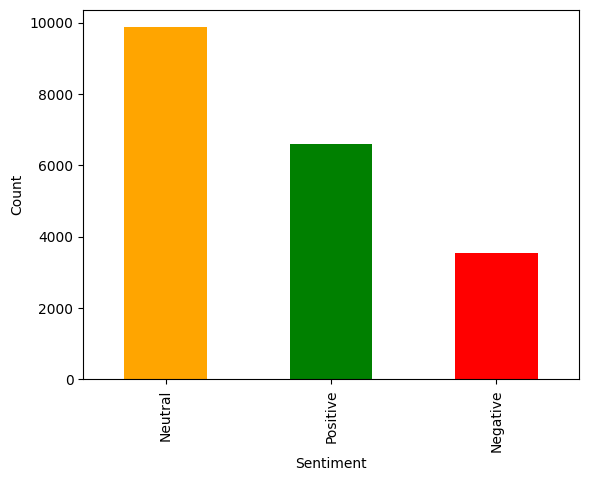

In [ ]:
result = dff["Unigram_Sentiment"].value_counts()
plt.xlabel('Sentiment')
plt.ylabel('Count')
result.plot(kind="bar", color = ['orange','green','red']);

In [ ]:
df.groupby("label").count()

,post_text,user_id,tokens
label,,,
0,10000,10000,10000
1,10000,10000,10000


<Axes: xlabel='label', ylabel='count'>

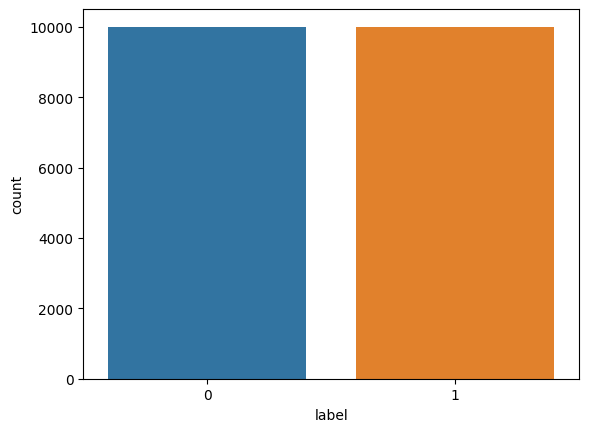

In [ ]:
plt.xlabel('Label')
plt.ylabel('Count')
sns.countplot(x ='label', data = df)

In [ ]:
df_depression = df[df['label'] == 1]
df_depression.tail()

,post_text,user_id,label,tokens
9995,rt cslewisu agreed forgiveness beautiful idea ...,2766067037,1,"[rt, cslewisu, agreed, forgiveness, beautiful,..."
9996,cant believe year blastyblast wlmhk picstitch ...,2766067037,1,"[cant, believe, year, blastyblast, wlmhk, pics..."
9997,one year ago journey began never knew challeng...,2766067037,1,"[one, year, ago, journey, began, never, knew, ..."
9998,found new hammocking friend park today gotta s...,2766067037,1,"[found, new, hammocking, friend, park, today, ..."
9999,xanabby youll grow like,2766067037,1,"[xanabby, youll, grow, like]"


In [ ]:
X = df['post_text']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_unigrams = vectorizer.fit_transform(X_train)
X_test_unigrams = vectorizer.transform(X_test)

In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_train_bigrams = bigram_vectorizer.fit_transform(X_train)
X_test_bigrams = bigram_vectorizer.transform(X_test)

In [ ]:
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
X_train_trigrams = trigram_vectorizer.fit_transform(X_train)
X_test_trigrams = trigram_vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 200)

In [ ]:
lr.fit(X_train_unigrams, y_train)

LogisticRegression(max_iter=200)

In [ ]:
s1 = lr.score(X_test_unigrams, y_test)
print(s1)


0.857


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred1 = lr.predict(X_test_unigrams)
cm1 = confusion_matrix(y_test, y_pred1)
cls = classification_report(y_test, y_pred1)
print(cm1)
print(cls)

[[1711  270]
 [ 302 1717]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1981
           1       0.86      0.85      0.86      2019

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000



In [ ]:
lr.fit(X_train_bigrams, y_train)
sb1 = lr.score(X_test_bigrams, y_test)
print(sb1)

0.72625


In [ ]:
lr.fit(X_train_trigrams, y_train)
st1 = lr.score(X_test_trigrams, y_test)
print(st1)

0.58025


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k = 5
X_new = vectorizer.fit_transform(X)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
scores = cross_val_score(lr, X_new, y, cv=kf, scoring='accuracy')
k1 = scores.mean()
print("Mean accuracy:", k1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_unigrams, y_train)

In [ ]:
s2 = nb.score(X_test_unigrams, y_test)
print(s2)

In [ ]:
y_pred2 = nb.predict(X_test_unigrams)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
cls = classification_report(y_test, y_pred2)
print(cls)

In [ ]:
nb.fit(X_train_bigrams, y_train)
sb2 = nb.score(X_test_bigrams, y_test)
print(sb2)

In [ ]:
nb.fit(X_train_trigrams, y_train)
st2 = lr.score(X_test_trigrams, y_test)
print(st2)

In [ ]:
scores = cross_val_score(nb, X_new, y, cv=kf, scoring='accuracy')
k2 = scores.mean()
print("Mean accuracy:", k2)

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train_unigrams,y_train)

In [ ]:
s3 = sv.score(X_test_unigrams, y_test)
print(s3)

In [ ]:
y_pred3 = sv.predict(X_test_unigrams)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
cls = classification_report(y_test, y_pred3)
print(cls)

In [ ]:
scores = cross_val_score(sv, X_new, y, cv=kf, scoring='accuracy')
k3 = scores.mean()
print("Mean accuracy:", k3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
s4 = rf.score(X_test, y_test)
print(s4)

In [ ]:
y_pred4 = rf.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
cls = classification_report(y_test, y_pred4)
print(cls)

In [ ]:
scores = cross_val_score(rf, X_new, y, cv=kf, scoring='accuracy')
k4 = scores.mean()
print("Mean accuracy:", k4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

In [ ]:
s5 = dt.score(X_test, y_test)
print(s5)

In [ ]:
y_pred5 = rf.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
cls = classification_report(y_test, y_pred5)
print(cls)

In [ ]:
scores = cross_val_score(dt, X_new, y, cv=kf, scoring='accuracy')
k5 = scores.mean()
print("Mean accuracy:", k5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5, p=2)
kn.fit(X_train, y_train)

In [ ]:
s6 = kn.score(X_test, y_test)
print(s6)

In [ ]:
y_pred6 = rf.predict(X_test)
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
cls = classification_report(y_test, y_pred6)
print(cls)

In [ ]:
scores = cross_val_score(kn, X_new, y, cv=kf, scoring='accuracy')
k6 = scores.mean()
print("Mean accuracy:", k6)

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'Decision Tree', 'KNN'],
    'Accuracy_score' :[s1, s2, s3, s4, s5, s6]
})
models

In [ ]:
accur = pd.DataFrame({
    'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'Decision Tree', 'KNN'],
    'Accuracy_score' :[k1, k2, k3, k4, k5, k6]
})
accur

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='Model', y='Accuracy_score', data=models)